## Problem 24: Larmor Precession (Phase Evolution)

**Physics:**  
Unitary evolution under a longitudinal field ($H \propto \sigma_z$) does not change the populations of the energy eigenstates, but it rotates the **relative phase** of a superposition. This effect is known as **Larmor precession**.

**System:** A two-level quantum system (qubit).

**Tasks:**

1. **Initial State:** Create the superposition state  
   $|\psi_0\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.

2. **Hamiltonian:** Define the Hamiltonian  
   $H = \pi\,\sigma_z$.

3. **Time Evolution:**  
   - Define `ttimes = [0, 0.5, 1.0]`.  
   - Use `mesolve(H, psi0, times, [], [])` to evolve the state and obtain the state vectors from `result.states`.

4. **Analysis:** Print the states at  
   - $t = 0$  
   - $t = 0.5$  
   - $t = 1.0$

**Expected Physics Check:**

- **At $t = 0$:** The state should be approximately `[0.707, 0.707]`.
- **At $t = 0.5$:** The relative phase is $e^{-i\pi/2} = -i$, corresponding to a $\pi/2$ phase rotation.
- **At $t = 1.0$:** The state should return to the equatorial plane with a relative minus sign, corresponding to  
  $|-\rangle = (|0\rangle - |1\rangle)/\sqrt{2}$, up to a global phase.


In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
psi = (basis(2,0)+basis(2,1)).unit()
H = np.pi*sigmaz()                  # Hamiltonian
times = [0,0.5,1.0]   # Time array
result = mesolve(H,psi,times,[],[])  # Evolve mesolve(H, psi0, tlist, c_ops, e_ops)
for i ,t in enumerate(times):
    print(f"Times {t}:\n{result.states[i]}")


Times 0:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]
Times 0.5:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-6.3043358e-07-0.70710678j]
 [-6.3043358e-07+0.70710678j]]
Times 1.0:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.70710678+3.52384327e-07j]
 [-0.70710678-3.52384327e-07j]]


/media/iterium/New Volume/My Quantum Lab/.venv/lib/python3.12/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


**Physics Check:**

- **Time 0.5:** The state is `[-0.707j, 0.707j]`. Factoring out a global phase of $-i$ gives  
  $(|0\rangle - |1\rangle)/\sqrt{2}$.  
  This shows that the **relative phase** between $|0\rangle$ and $|1\rangle$ has rotated by $\pi$ (from “$+$” to “$-$”).

- **Time 1.0:** The state is `[-0.707, -0.707]`, which is simply $-1 \times |+\rangle$.  
  The system has returned to the original superposition, but with an overall **global phase** of $-1$. This phase is physically unobservable, but it is mathematically correct for a $\pi$ rotation.


## Problem 25: The Rabi Flip (Population Transfer)

**Physics:**  
So far, we have seen how a Hamiltonian proportional to $\sigma_z$ changes the **phase** of a superposition without changing populations.  
To **flip a qubit** from $|0\rangle$ to $|1\rangle$, the Hamiltonian must *connect* these states. This requires an **off-diagonal operator**, such as $\sigma_x$.

If  
$H = \frac{\Omega}{2}\,\sigma_x$,  
then the probability of finding the system in the excited state is  
$P_1(t) = \sin^2\!\left(\frac{\Omega t}{2}\right)$.

In this problem, set $\Omega = 1$, so  
$H = 0.5\,\sigma_x$.

A **full population flip** ($P_1 = 1$) should occur at $t = \pi$.

**System:** A two-level quantum system (qubit).

**Tasks:**

1. **Initial State:** Create the ground state $|0\rangle$.

2. **Hamiltonian:** Define the Hamiltonian  
   $H = 0.5 \times \sigma_x$  
   using `sigmax()`.

3. **Time Evolution:**  
   - Evolve the system from $t = 0$ to $t = 2\pi$.  
   - Use 100 time steps.

4. **Expectation Value:** Track the population of the excited state using either  
   - the number operator `num(2)`, or  
   -  the projector onto the excited state $|1\rangle\langle 1|$, which in QuTiP is created using  
  `basis(2, 1) * basis(2, 1).dag()`


5. **Plot:** Plot the excited-state population as a function of time.

**Expected Physics Check:**  
The plot should show a $\sin^2$ curve:
- starting at 0,
- reaching a maximum of 1 at $t = \pi$,
- and returning to 0 at $t = 2\pi$.

This is the hallmark of **Rabi oscillations**.



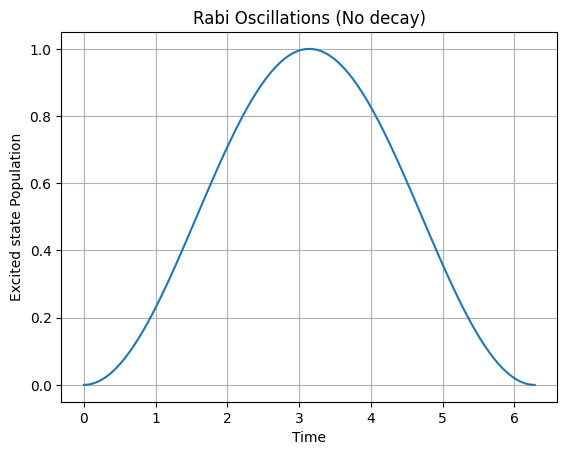

Population at t=pi (approx index 50): 0.9997


In [17]:
psi0 = basis(2,0)
H = 0.5*sigmax()
times = np.linspace(0,2*np.pi,100)
result = mesolve(H,psi0,times,[],[num(2)])
plt.plot(times,result.expect[0])
plt.xlabel("Time")
plt.ylabel("Excited state Population")
plt.title("Rabi Oscillations (No decay)")
plt.grid(True)
plt.show()
print(f"Population at t=pi (approx index 50): {result.expect[0][50]:.4f}")

## Problem 26: Detuned Rabi Oscillations

**Physics:**  
In Problem 25, we had perfect population transfer because the driving field was exactly on resonance.  
If we introduce a **detuning** $\Delta$ (represented by a $\sigma_z$ term), the qubit still tries to flip, but the **axis of rotation tilts** away from the equator of the Bloch sphere.

The effective Hamiltonian is  
$H = \frac{\Delta}{2}\,\sigma_z + \frac{\Omega}{2}\,\sigma_x$.

**Consequence:**  
- The qubit oscillates **faster**.
- The oscillation **amplitude is reduced**.
- The excited-state population never reaches 1.

This sets a fundamental limit in quantum control.

**System:** A two-level quantum system (qubit).

**Tasks:**

1. **Initial State:** Create the ground state $|0\rangle$.

2. **Hamiltonian:** Define  
   $H = 0.5\,\sigma_z + 0.5\,\sigma_x$,  
   corresponding to $\Delta = 1.0$ and $\Omega = 1.0$.

3. **Time Evolution:**  
   - Evolve the system from $t = 0$ to $t = 4\pi$.  
   - Use a sufficiently fine time grid to clearly resolve the oscillations.

4. **Expectation Value:** Track the excited-state population using `num(2)`.

5. **Plot:** Plot the excited-state population as a function of time.

**What to Look For:**

- **Maximum Population:**  
  Does the excited-state population reach 1.0?  
  It should not. The maximum value should be  
  $\Omega^2 / (\Omega^2 + \Delta^2) = 0.5$.

- **Oscillation Frequency:**  
  Is the oscillation faster than in Problem 24?  
  Yes. The effective Rabi frequency is  
  $\sqrt{\Omega^2 + \Delta^2}$.

This behavior is known as **detuned Rabi oscillations** and is a cornerstone of driven two-level dynamics.


/tmp/ipykernel_12153/1281357965.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


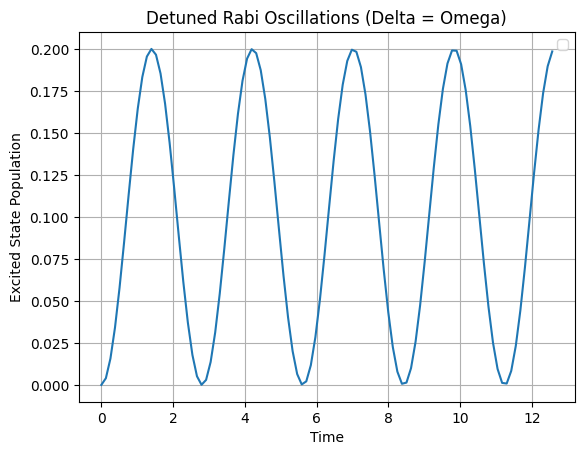

In [ ]:
psi0 = basis(2,0)
delta = 1.0
omega = 1.0
H = delta*0.5*sigmaz() + omega*0.5*sigmax()
c_ops = []
e_ops = [num(2)]
times = np.linspace(0,4*np.pi,100)
result = mesolve(H,psi0,times,c_ops,e_ops)
plt.plot(times,result.expect[0])
plt.xlabel("Time")
plt.ylabel("Excited State Population")
plt.title("Detuned Rabi Oscillations (Delta = Omega)")
plt.legend()
plt.grid(True)
plt.show()


## Problem 27: Spin Echo (Fixing the Detuning)

**Physics:**  
In real experiments (such as MRI and quantum computing), *detuning* is often an unwanted error caused by inhomogeneous fields. Different qubits (or atoms) experience slightly different magnetic fields, so they precess at different rates and gradually **dephase**.

A **spin echo** sequence cancels this error:

- Wait for a time $\tau$ → the qubit dephases.
- Apply a $\pi$-pulse (a $180^\circ$ rotation about the X-axis).
- Wait for another time $\tau$ → the accumulated phase error reverses.
- The qubit **refocuses**, undoing the detuning effect.

---

**System:** A two-level quantum system (qubit).

**Goal:** Demonstrate that detuning-induced phase errors can be reversed using a spin echo sequence.

---

**Tasks:**

1. **Initial State:**  
   Create the superposition state  
   $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.  
   This state is maximally sensitive to phase errors.

2. **Step 1 — Dephasing:**  
   - Define the Hamiltonian $H = \Delta\,\sigma_z$ with $\Delta = 1.0$.  
   - Evolve the state for a time $\tau = 2.0$.  
   - Call the resulting state `psi_step1`.

3. **Step 2 — $\pi$-Pulse:**  
   - Apply a $180^\circ$ rotation about the X-axis using  
     $U_\pi = -i\,\sigma_x$.  
   - Compute  
     `psi_flipped = (-1j * sigmax()) * psi_step1`.

4. **Step 3 — Refocusing:**  
   - Take `psi_flipped` and evolve it again under  
     $H = \Delta\,\sigma_z$ for the same time $\tau = 2.0$.  
   - Call the resulting state `psi_final`.

5. **Check (Measurement):**  
   - Compute the expectation value of $\sigma_x$ for `psi_final`.

---

**Expected Physics Check:**

- If the spin echo worked, the final state should point along the X-axis again.
- The expectation value should satisfy  
  $\langle \sigma_x \rangle \approx 1.0$.
- This confirms that the phase error introduced by detuning was **cancelled**.

Spin echo is a cornerstone technique in NMR, MRI, and quantum error mitigation.


In [42]:
delta = 1.0
tau = 2.0
psi0 = (basis(2,0)+basis(2,1)).unit() 
print(f"Start <sigma_x>: {expect(sigmax(),psi0)}")
H_error = delta*sigmaz()
times = [0,tau]
c_ops = []
e_ops = []
result1 = mesolve(H_error,psi0,times,c_ops,e_ops)
psi1 = result1.states[-1]
print(f"After wait <sigma_x>: {expect(sigmax(),psi1)}")
psi_flipped = (-1j*sigmax())*psi1
result2 = mesolve(H_error,psi_flipped,times,c_ops,e_ops)
psi_final = result2.states[-1]
print(f"Final <sigma_x>: {expect(sigmax(),psi_final)}")

Start <sigma_x>: 0.9999999999999998
After wait <sigma_x>: -0.6536420647723018
Final <sigma_x>: 0.9999999999999998


## Problem 28: Ramsey Fringe (Interference)

**Physics:**  
In the spin echo experiment, a $\pi$-pulse cancels phase errors.  
In **Ramsey interferometry**, we instead *measure* those phase errors very precisely using a  
$\pi/2$ – wait – $\pi/2$ sequence.

The sequence works as follows:

- Start in the ground state $|0\rangle$.
- Apply a $\pi/2$ pulse → create a superposition ($|+\rangle$-like state).
- Wait for a time $\tau$ → a relative phase $e^{-i\Delta\tau}$ accumulates.
- Apply another $\pi/2$ pulse → phase information is converted into population.

**Result:**  
The probability of finding the system in the excited state oscillates as  
$P_1(\tau) = \cos^2(\Delta \tau / 2)$.

This oscillation is known as a **Ramsey fringe** and is widely used for precision frequency measurements.

---

**System:** A two-level quantum system (qubit).

---

**Tasks:**

1. **Initial State:**  
   Create the ground state $|0\rangle$.

2. **First Pulse ($\pi/2$):**  
   Apply a $\pi/2$ rotation about the Y-axis using  
   $R_y(\pi/2) = e^{-i \frac{\pi}{4} \sigma_y}$.  

   In QuTiP, construct it explicitly as  
   `(-1j * (np.pi/4) * sigmay()).expm()`.

3. **Free Evolution (Wait):**  
   - Define the Hamiltonian $H = \Delta\,\sigma_z$.  
   - Evolve the state for a variable wait time $\tau$.

4. **Second Pulse ($\pi/2$):**  
   Apply the same Y-axis $\pi/2$ rotation again.

5. **Measurement:**  
   - Measure the excited-state population $P_1(\tau)$.  
   - Plot $P_{excited}$ as a function of the wait time $\tau$.

---

**Expected Physics Check:**

- The excited-state population should oscillate with $\tau$.
- The oscillation follows  
  $P_1(\tau) = \cos^2(\Delta \tau / 2)$.
- This interference pattern is the **Ramsey fringe**, revealing the detuning $\Delta$.

Ramsey interferometry is a cornerstone of atomic clocks, NMR, and quantum metrology.


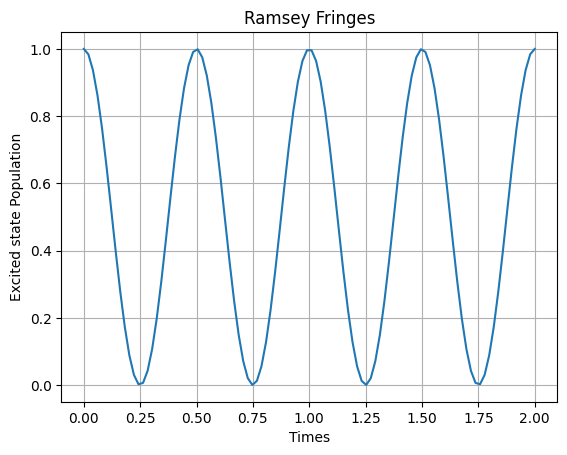

In [5]:
psi0 = basis(2,0)
delta = 2*np.pi
H_wait = delta*sigmaz()
Ry = (-1j*(np.pi/4)*sigmay()).expm()
times = np.linspace(0,2,100)
final_pops = []
for t in times:
    psi_1 = Ry*psi0   # A. First Pulse
    U_wait = (-1j*H_wait*t).expm()   #    We can use exact solution for constant H: U = (-iHt).expm()
    psi_2 = U_wait*psi_1
    psi_final = Ry*psi_2
    pop_1 = np.abs(psi_final.overlap(basis(2,1)))**2
    final_pops.append(pop_1)
plt.plot(times,final_pops)
plt.xlabel("Times")
plt.ylabel("Excited state Population")
plt.title("Ramsey Fringes")
plt.grid(True)
plt.show()





## Problem 29: $T_1$ vs $T_2$ — Visualizing Decay on the Bloch Sphere

**Physics:**  
So far, we have studied **unitary dynamics**, where states move on the surface of the Bloch sphere without shrinking.  
Now we introduce **open-system effects** and visualize how decoherence changes the Bloch vector.

There are two fundamental decoherence processes:

- **Energy Relaxation ($T_1$):**  
  The qubit loses energy to the environment and relaxes to the ground state $|0\rangle$.  
  On the Bloch sphere, the vector shrinks toward the **south pole**.

- **Dephasing ($T_2$):**  
  The qubit loses phase coherence without changing populations.  
  On the Bloch sphere, the vector shrinks toward the **Z-axis**, killing off-diagonal terms.

This problem visually distinguishes these two processes.

---

**System:** A two-level quantum system (qubit).

---

**Tasks:**

1. **Imports:**  
   Import `Bloch` from `qutip` along with the usual operators.

2. **Initial State:**  
   Create the superposition state  
   $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.

3. **$T_1$ Simulation (Energy Relaxation):**  
   - Set the Hamiltonian $H = 0$.  
   - Define the collapse operator  
     $c_{\text{ops}} = [\sqrt{0.5}\,\sigma_-]$.  
   - Use `mesolve` to evolve the system and store the resulting states.

4. **$T_2$ Simulation (Pure Dephasing):**  
   - Set the Hamiltonian $H = 0$.  
   - Define the collapse operator  
     $c_{\text{ops}} = [\sqrt{0.25}\,\sigma_z]$.  
   - Use `mesolve` to evolve the system and store the resulting states.

5. **Visualization:**  
   - Create a Bloch sphere using `Bloch()`.  
   - Add both trajectories to the sphere.  
   - Label or color them to distinguish $T_1$ and $T_2$ processes.

---

**Expected Physics Check:**

- **$T_1$ trajectory:**  
  The Bloch vector spirals inward and ends at the south pole ($|0\rangle$).

- **$T_2$ trajectory:**  
  The Bloch vector shrinks toward the center along the equatorial plane, preserving $z$ but destroying coherence.

This visualization clearly demonstrates the **physical difference between relaxation and dephasing**, a cornerstone concept in quantum information and open quantum systems.


/media/iterium/New Volume/My Quantum Lab/.venv/lib/python3.12/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


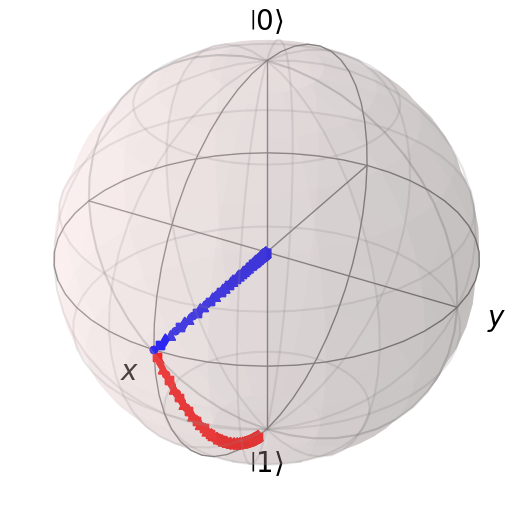

In [14]:
psi = (basis(2,0)+basis(2,1)).unit()
H = 0*sigmaz()
times = np.linspace(0,10,100)
c_ops = [np.sqrt(0.5)*sigmam()]
e_ops = []
result_T1 = mesolve(H,psi,times,c_ops,e_ops)
c_ops = [np.sqrt(0.25)*sigmaz()]
result_T2 = mesolve(H,psi,times,c_ops,e_ops)
b = Bloch()
b.add_states(result_T1.states, kind= "point" , colors="red")
b.add_states(result_T2.states, kind="point", colors="blue")
b.show()

## Problem 30: The Quantum Harmonic Oscillator (Coherent State)

**Physics:**  
A quantum harmonic oscillator (such as a vibrating atom or a particle in a quadratic potential) has an infinite ladder of energy eigenstates  
$|0\rangle, |1\rangle, |2\rangle, \dots$.

A **coherent state** $|\alpha\rangle$ is a special superposition of these states that behaves most like a classical particle. Under harmonic evolution, it oscillates back and forth in the potential well **without changing shape**.

---

**System:** A quantum harmonic oscillator with a finite Hilbert-space cutoff.

---

**Tasks:**

1. **Hilbert Space:**  
   Define the Hilbert-space dimension (cutoff) as  
   `N = 25`.

2. **Operators:**  
   - Define the annihilation operator `a = destroy(N)`.  
   - Define the Hamiltonian  
     $H = a^\dagger a$  
     (this is the number operator; you may also use `num(N)`).

3. **Initial State:**  
   Create a coherent state with amplitude $\alpha = 2.0$ using  
   `coherent(N, alpha)`.

4. **Position Operator:**  
   Define the position operator  
   $\hat{x} = (a + a^\dagger)/\sqrt{2}$.

5. **Time Evolution:**  
   - Evolve the system from $t = 0$ to $t = 4\pi$.  
   - Use a sufficiently fine time grid.

6. **Expectation Value:**  
   Track the expectation value $\langle x \rangle$ as a function of time.

7. **Plot:**  
   Plot $\langle x \rangle$ versus time.

---

**Expected Result:**  

- The plot should be a **perfect cosine wave**.  
- The motion starts at  
  $x(0) \approx 2\sqrt{2} \approx 2.8$.  
- This demonstrates that coherent states follow **classical harmonic motion** while remaining fully quantum.

This is one of the clearest examples of the **quantum–classical correspondence**.


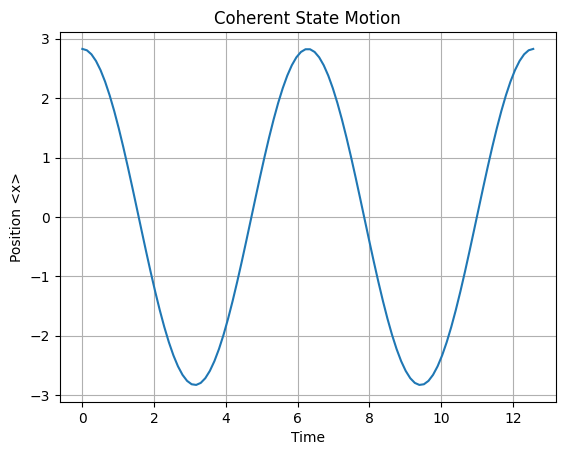

In [49]:
N = 25
a = destroy(25)
H = num(25)
alpha = 2.0
psi0 = coherent(N,alpha)
x = (a + a.dag())*(1/np.sqrt(2))
times = np.linspace(0,4*np.pi,100)
c_ops = []
e_ops = [x]
result = mesolve(H,psi0,times,c_ops,e_ops)
expectation = result.expect[0]
plt.plot(times,expectation)
plt.xlabel("Time")
plt.ylabel("Position <x>")
plt.title("Coherent State Motion")
plt.grid(True)
plt.show()

## Problem 31: Squeezed States (Quantum Noise Engineering)

**Physics:**  
According to the Heisenberg uncertainty principle,  
$\Delta x\,\Delta p \ge \hbar/2$.

A **coherent state** is a *minimum uncertainty state* with  
$\Delta x = \Delta p$.

A **squeezed state** redistributes this uncertainty:
- the noise in one quadrature (e.g. position $x$) is reduced below the vacuum level,
- while the noise in the conjugate quadrature (momentum $p$) is increased.

This process is called **quantum noise squeezing** and is central to precision measurements (e.g. gravitational-wave detectors).

---

**System:** A quantum harmonic oscillator.

---

**Tasks:**

1. **Hilbert Space:**  
   Define a sufficiently large Hilbert-space cutoff  
   `N = 60`.  
   (Squeezing populates higher energy levels, so a larger cutoff is required.)

2. **State Generation:**  
   Create a squeezed vacuum state with squeezing parameter  
   $r = 0.5$  
   using  
   `squeeze(N, r)*basis(N,0)`.

3. **Phase-Space Grid:**  
   Create a coordinate grid  
   `xvec = np.linspace(-5, 5, 200)`.

4. **Wigner Function:**  
   Compute the Wigner function  
   `W = wigner(psi, xvec, xvec)`,  
   which represents a quasi-probability distribution in phase space $(x, p)$.

5. **Visualization:**  
   Use `plt.contourf` to plot the Wigner function.

---

**Physics Check:**

- The Wigner function should appear as an **elongated ellipse** in phase space.
- This contrasts with the **circular** Wigner function of a coherent state.
- The squeezed axis corresponds to reduced quantum noise in one quadrature and increased noise in the conjugate quadrature.

Squeezed states are a key resource in **quantum metrology**, **quantum optics**, and **continuous-variable quantum information**.


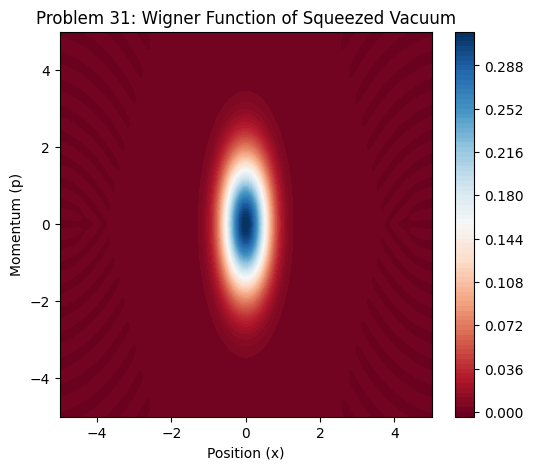

In [24]:
from qutip import *
N = 60
r = 0.5
psi = squeeze(N,r)*basis(N,0)
xvec = np.linspace(-5,5,100)
W_fun = wigner(psi,xvec,xvec)
plt.figure(figsize= (6,5))
cont = plt.contourf(xvec,xvec,W_fun,100,cmap ="RdBu")
plt.colorbar(cont)
plt.title("Problem 31: Wigner Function of Squeezed Vacuum")
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.show()

## Problem 32: Dynamics of a Squeezed State (Rotation in Phase Space)

**Physics:**  
A squeezed state has a preferred **noise axis** in phase space. One quadrature (e.g. position $x$) has reduced uncertainty, while the conjugate quadrature (momentum $p$) has increased uncertainty.

Under unitary harmonic evolution with Hamiltonian  
$H = \omega\,a^\dagger a$,  
the state undergoes a **rigid rotation in phase space** at frequency $\omega$.

As a result:
- a state squeezed in $x$ evolves into a state squeezed in $p$,
- and continues rotating periodically.

This is a purely quantum effect with a clear geometric interpretation.

---

**System:** Quantum harmonic oscillator.

---

**Tasks:**

1. **Hilbert Space:**  
   Choose a sufficiently large cutoff, e.g.  
   `N = 60`.

2. **Initial State:**  
   Create a squeezed vacuum state  
   $|\xi\rangle = S(r)|0\rangle$  
   with squeezing parameter $r = 0.5$.

3. **Hamiltonian:**  
   Define the harmonic oscillator Hamiltonian  
   $H = a^\dagger a$  
   (you may use `num(N)`).

4. **Time Evolution:**  
   Evolve the state under $H$ for:
   - $t = 0$
   - $t = \pi/2$ (corresponding to a $90^\circ$ rotation in phase space)

5. **Phase-Space Visualization:**  
   - Compute the Wigner function at both times.
   - Use the same phase-space grid for consistency.
   - Plot the two Wigner functions side by side.

---

**Expected Physics Check:**

- At **$t = 0$**:  
  The Wigner function should be an **ellipse squeezed along one axis** (e.g. position).

- At **$t = \pi/2$**:  
  The ellipse should be **rotated by $90^\circ$**, indicating that the squeezing has transferred from position to momentum.

This demonstrates that harmonic evolution rotates the squeezing axis without changing the amount of squeezing.

---

This problem highlights the **geometric nature of quantum dynamics in phase space** and shows how squeezing behaves as a rotating quantum resource.


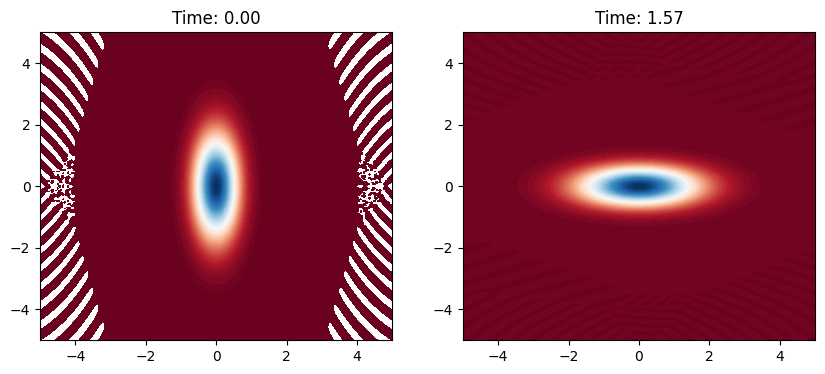

In [6]:
N = 100
r = 0.5
H = num(N)
psi0 = squeeze(N,r)*basis(N,0)
xvec = np.linspace(-5,5,100)
times = [0,np.pi/2]
W_fun = wigner(psi,xvec,xvec)
result = mesolve(H,psi0,times,[],[])
xvec = np.linspace(-5, 5, 200)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axes):
    W = wigner(result.states[i], xvec, xvec)
    ax.contourf(xvec, xvec, W, 100, cmap='RdBu')
    ax.set_title(f"Time: {times[i]:.2f}")

plt.show()

## Problem 32: Phase Rotation of a Cat State

**Physics:**  
A Schrödinger cat state is a quantum superposition of two macroscopically distinct coherent states:  
$|\psi_{\text{cat}}\rangle \propto |\alpha\rangle + |-\alpha\rangle$.

The defining signature of this state is the presence of **interference fringes** in its Wigner function.  
These fringes encode the *quantumness* of the superposition.

Under **unitary harmonic evolution**, the Hamiltonian  
$H = a^\dagger a$  
generates a rigid rotation in phase space. Both the coherent peaks *and* the interference fringes must rotate together.

If the fringes disappear or blur, the evolution is non-unitary and decoherence has occurred.  
For this reason, cat states provide a stringent test of quantum simulators.

---

**System:** Quantum harmonic oscillator.

---

**Tasks:**

1. **Hilbert Space:**  
   Choose a sufficiently large cutoff, for example `N = 80`, since cat states populate many Fock levels.

2. **Initial State (Cat State):**  
   Create the even cat state  
   $|\psi_0\rangle \propto |\alpha\rangle + |-\alpha\rangle$  
   with $\alpha = 2.5$.

3. **Hamiltonian:**  
   Define the harmonic oscillator Hamiltonian  
   $H = a^\dagger a$  
   (you may use `num(N)` in QuTiP).

4. **Time Evolution:**  
   Evolve the state under $H$ for  
   $t = \pi$.

5. **Phase-Space Visualization:**  
   - Compute the Wigner function at:
     - $t = 0$
     - $t = \pi$
   - Use the same phase-space grid for both times.
   - Plot the two Wigner functions side by side.

---

**Expected Physics Check:**

- At **$t = 0$**:  
  Two well-separated coherent peaks appear with clear interference fringes between them.

- At **$t = \pi$**:  
  The state  
  $|\alpha\rangle + |-\alpha\rangle$  
  evolves into  
  $|-\alpha\rangle + |\alpha\rangle$,  
  corresponding to a rigid rotation in phase space.

- **Crucially:**  
  The interference fringes must rotate along with the coherent peaks.  
  Their survival confirms **unitary evolution** and preservation of quantum coherence.

This problem demonstrates how macroscopic quantum superpositions behave under ideal harmonic evolution.


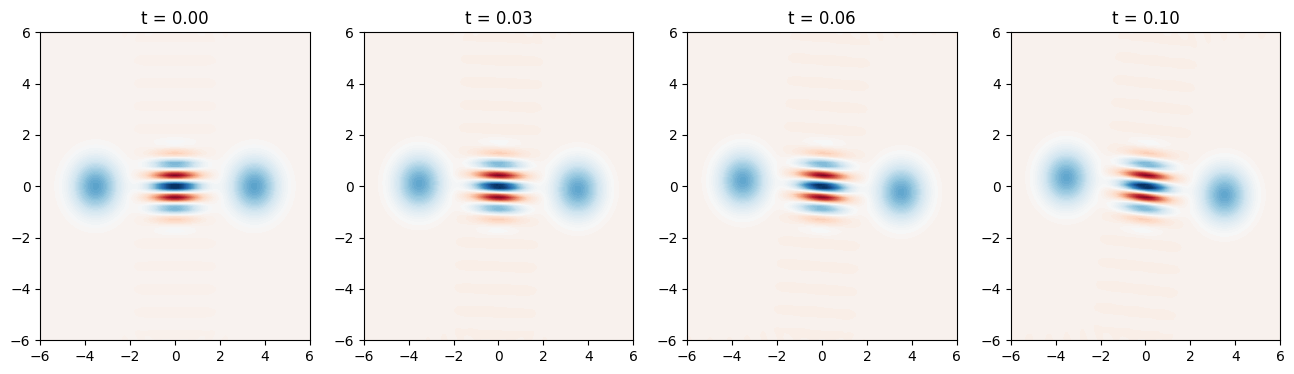

In [16]:
N = 80
alpha = 2.5
psi = (coherent(N,alpha)+ coherent(N,-alpha)).unit()
H = num(80)
times = np.linspace(0,np.pi,100)
result = mesolve(H,psi,times,[],[])
xvec = np.linspace(-6,6,100)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in enumerate(axes):
    W = wigner(result.states[i], xvec, xvec)
    ax.contourf(xvec, xvec, W, 100, cmap='RdBu')
    ax.set_title(f"t = {times[i]:.2f}")

plt.show()

## Problem 33: Fock States and Wigner Negativity

**Physics:**  
Fock states $|n\rangle$ (number states) are among the most **non-classical** states in quantum mechanics.  
Unlike coherent or squeezed states, their Wigner functions exhibit **strong negative regions**, which have no classical analogue.

For MSc-level research, **Wigner negativity** is often used as a quantitative witness of genuine quantum behavior.

---

**System:** Quantum harmonic oscillator.

---

**Tasks:**

1. **Hilbert Space:**  
   Define a finite Hilbert-space cutoff, for example `N = 20`.

2. **Initial State (Fock State):**  
   Create the number state  
   $|n = 3\rangle$  
   using `basis(N, 3)`.

3. **Hamiltonian:**  
   Define the harmonic oscillator Hamiltonian  
   $H = a^\dagger a$  
   (you may use `num(N)`).

4. **Time Evolution:**  
   Evolve the state under $H$ for  
   $t = \pi$.

   *Note:* Fock states are energy eigenstates, so their Wigner functions are **rotationally symmetric** and should not change under this evolution.

5. **Phase-Space Visualization:**  
   - Compute the Wigner function at:
     - $t = 0$
     - $t = \pi$
   - Use a diverging colormap such as `RdBu`.
   - Add a **zero contour line** to clearly separate positive and negative regions.

---

**Expected Physics Check:**

- The Wigner function should display **alternating rings** of positive and negative values.
- Strong **negative regions** must be clearly visible.
- The Wigner function at $t = \pi$ should be **identical** to that at $t = 0$, confirming rotational symmetry.
- The presence of negativity confirms the **non-classical nature** of the Fock state.

Wigner negativity is a central diagnostic tool in quantum optics, quantum simulation, and continuous-variable quantum information.


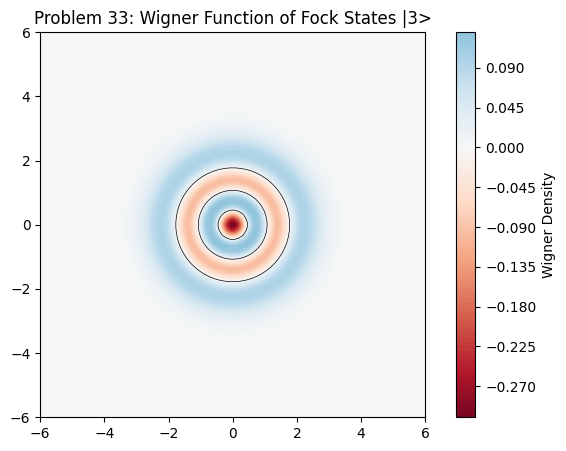

In [22]:
N = 20
psi_fock = fock(N,3)
H = num(N)
times = np.linspace(0,np.pi,100)
result = mesolve(H,psi_fock,times,[],[])
xvec = np.linspace(-6,6,100)
fig, ax = plt.subplots(figsize = (8,5))
Wigner = wigner(psi_fock,xvec,xvec)
limit = 1/np.pi
cont = ax.contourf(xvec,xvec,Wigner,100,cmap ="RdBu",vmin = -limit,vmax = limit)
ax.contour(xvec,xvec,Wigner,levels = [0],colors = "black",linewidths = 0.5)
ax.set_title("Problem 33: Wigner Function of Fock States |3>")
ax.set_aspect("equal")
plt.colorbar(cont,label = "Wigner Density")
plt.show()

### Explanation

This notebook visualizes the Wigner function of the Fock state $|n=3\rangle$, a highly non-classical quantum state of the harmonic oscillator. Unlike coherent or squeezed states, Fock states exhibit strong **Wigner negativity**, which has no classical interpretation and serves as a clear witness of genuine quantum behavior.

The Wigner function shows **concentric rings of alternating positive and negative values**, reflecting the discrete energy structure of the state. A zero-contour line is included to clearly separate quantum (negative) regions from classical-like (positive) regions.

Since $|n\rangle$ is an eigenstate of the Hamiltonian $H = a^\dagger a$, its phase-space distribution is **rotationally symmetric** and remains unchanged under unitary time evolution. The persistence of negativity confirms the non-classical nature of the state.


## Problem 35: Jaynes–Cummings Collapse and Revival

**Physics:**  
In hybrid quantum systems such as a superconducting qubit coupled to a bosonic mode (e.g. photons or magnons in YIG), the interaction is well described by the **Jaynes–Cummings model**.  

When the cavity is prepared in a **coherent state**, the qubit population does not undergo simple Rabi oscillations. Instead, the oscillations **collapse** due to dephasing between different photon-number components and later **revive** when these phases re-align. This collapse-and-revival phenomenon is a purely quantum effect arising from the discrete energy spectrum of the cavity field.

---

**System:**  
Composite Hilbert space: Qubit $\otimes$ Cavity  
- Qubit dimension: $N_\text{qubit} = 2$  
- Cavity dimension: $N_\text{cavity} = 30$

---

**Setup:**

- **Initial State:**  
  Qubit in the excited state $|e\rangle$, cavity in a coherent state $|\alpha = 3\rangle$.

- **Hamiltonian:**  
  Jaynes–Cummings interaction  
  $H = g(a^\dagger \sigma_- + a \sigma_+)$  
  with coupling strength $g = 1.0$.

- **Dynamics:**  
  Time evolution from $t = 0$ to $t = 30$.

---

**Observation:**  

Track the qubit excitation probability $\langle \sigma_+ \sigma_- \rangle$ as a function of time.

---

**Expected Physics Check:**

- Initial fast Rabi oscillations.
- A **collapse** of oscillations due to photon-number–dependent Rabi frequencies.
- A later **revival**, demonstrating coherent quantum dynamics.
- The revival is a direct signature of field quantization and cannot occur in a classical model.

This phenomenon is a key benchmark for strong light–matter (or magnon–qubit) coupling and coherence preservation.


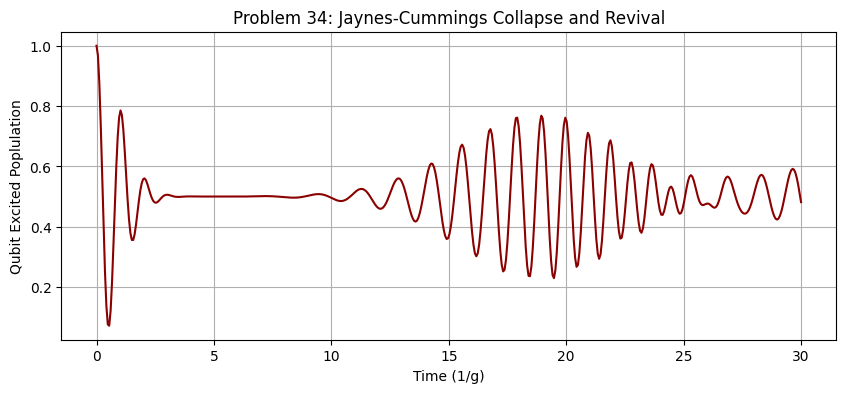

In [49]:
N_q = 2
N_c = 30
alpha = 3
g= 1.0
psi = tensor(basis(N_q,1),coherent(N_c,alpha))
a = tensor(qeye(2),destroy(N_c))
sm = tensor(sigmam(),qeye(N_c))
H = g*(a.dag()*sm + a*sm.dag())
times = np.linspace(0,30,500)
e_ops = [tensor(basis(2,1)*basis(2,1).dag(),qeye(N_c))]
results = mesolve(H,psi,times,[],e_ops)
plt.figure(figsize = (10,4))
plt.plot(times,results.expect[0],color = "darkred",lw = 1.5)
plt.title("Problem 34: Jaynes-Cummings Collapse and Revival")
plt.xlabel("Time (1/g)")
plt.ylabel("Qubit Excited Poplulation")
plt.grid(True)
plt.show()

### Explanation

This simulation demonstrates the collapse and revival of qubit population predicted by the Jaynes–Cummings model. The qubit is initially excited and coupled to a cavity prepared in a coherent state, which contains a superposition of many photon-number states.

Each photon-number component drives the qubit with a different Rabi frequency, causing the oscillations to dephase and collapse. At later times, these phases re-align, leading to a revival of coherent oscillations. This collapse-and-revival behavior is a purely quantum effect arising from the discrete nature of the cavity field and serves as a clear signature of quantized light–matter interaction.


## Problem 35: Coupled Oscillators (Two-Mode Energy Swapping)

**Physics:**  
In the paper, the system consists of **two ferromagnetic YIG spheres**, each supporting a magnon mode. At the Hamiltonian level, this setup is mathematically equivalent to **two coupled harmonic oscillators**.

The interaction is described by the exchange Hamiltonian  
$H = g(a^\dagger b + a b^\dagger)$,  
which conserves the total excitation number and causes energy to **swap coherently** between the two modes.

This model appears across physics in beam splitters, coupled cavities, magnon–magnon interactions, and bosonic quantum networks.

---

**System:**  
Two harmonic oscillators (Mode A and Mode B)

- Hilbert space dimensions:  
  $N_A = 15$, $N_B = 15$

---

**Tasks:**

1. **Initial State:**  
   Prepare the state  
   $|1, 0\rangle$,  
   where Mode A contains one excitation and Mode B is in the vacuum state.

2. **Hamiltonian:**  
   Define the exchange interaction  
   $H = g(a^\dagger b + a b^\dagger)$  
   with coupling strength $g$.

3. **Time Evolution:**  
   Evolve the system under $H$ for a sufficient time to observe multiple oscillations.

4. **Expectation Values:**  
   Track the photon (or magnon) number in each mode:
   - $\langle a^\dagger a \rangle$
   - $\langle b^\dagger b \rangle$

---

**Expected Physics Check:**

- The excitation oscillates **periodically** between the two modes.
- When Mode A is populated, Mode B is empty, and vice versa.
- The sum  
  $\langle a^\dagger a \rangle + \langle b^\dagger b \rangle = 1$  
  remains constant at all times.
- The dynamics represent a **perfect SWAP operation** in the single-excitation subspace.

This model provides a minimal description of coherent energy transfer between two bosonic subsystems and is directly applicable to coupled magnonic systems.


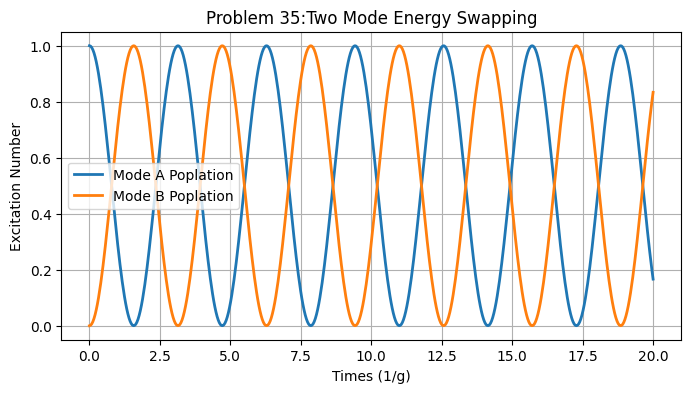

In [63]:
N_a = 15
N_b = 15
g = 1.0
psi = tensor(basis(N_a,1),basis(N_b,0))
a = tensor(destroy(N_a),qeye(N_b))
b = tensor(qeye(N_a),destroy(N_b))
H = g*(a.dag()*b+a*b.dag())
times = np.linspace(0,20,500)
n_a = a.dag()*a
n_b = b.dag()*b
e_ops = [n_a,n_b]
results = mesolve(H,psi,times,[],e_ops)
plt.figure(figsize= (8,4))
plt.plot(times,results.expect[0],label = "Mode A Poplation", lw =2)
plt.plot(times,results.expect[1],label = "Mode B Poplation", lw =2)
plt.xlabel("Times (1/g)")
plt.ylabel("Excitation Number")
plt.title("Problem 35:Two Mode Energy Swapping")
plt.legend()
plt.grid(True)
plt.show()